### Checking ERA5 winds ###

In [1]:
# Local imports
import os
import sys
import glob
import time
import argparse
import warnings

# Third-party imports
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import iris
import cftime
import seaborn as sns

In [2]:
# Set up the hard codded paths
base_path = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_dfs/"

# file paths
previous_sfcWind_filename = "ERA5_sfcWind_UK_wind_box_1960-2025_daily_2025-04-24.csv"
new_sfcWind_filename = "ERA5_sfcWind_UK_wind_box_1960-2025_daily_2025-05-20.csv"

# Set up the filepaths
previous_sfcWind_filepath = os.path.join(base_path, previous_sfcWind_filename)
new_sfcWind_filepath = os.path.join(base_path, new_sfcWind_filename)

# load the previous and new data
previous_sfcWind_df = pd.read_csv(previous_sfcWind_filepath)
new_sfcWind_df = pd.read_csv(new_sfcWind_filepath)

In [3]:
previous_sfcWind_df.head()

,time,data
0,2922.0,7.615330
1,2923.0,4.919935
2,2924.0,6.225503
3,2925.0,7.469524
4,2926.0,7.928751


In [4]:
new_sfcWind_df.head()

,obs_mean
0,7.615330
1,4.919935
2,6.225503
3,7.469524
4,7.928751


In [5]:
previous_sfcWind_df.shape

(22701, 2)

In [7]:
new_sfcWind_df.head()

,obs_mean
0,7.615330
1,4.919935
2,6.225503
3,7.469524
4,7.928751


In [9]:
# generate dates between 1960-01-01 and 2025-02-28
start_date = pd.to_datetime("1960-01-01")
end_date = pd.to_datetime("2025-02-28")

# Create a date range
date_range = pd.date_range(start=start_date, end=end_date, freq="D")

# add this as a new column
new_sfcWind_df["date"] = date_range

In [13]:
new_sfcWind_df.tail()

,obs_mean,date,month
23796,9.066401,2025-02-24,2
23797,6.864718,2025-02-25,2
23798,5.654507,2025-02-26,2
23799,5.668609,2025-02-27,2
23800,4.484280,2025-02-28,2


In [12]:
# limit to months 12, 1, 2
new_sfcWind_df["month"] = new_sfcWind_df["date"].dt.month
# filter to months 12, 1, 2
new_sfcWind_df = new_sfcWind_df[
    (new_sfcWind_df["month"] == 12)
    | (new_sfcWind_df["month"] == 1)
    | (new_sfcWind_df["month"] == 2)
]

In [14]:
# limit to between 2024-12-01 and 2025-02-28
new_sfcWind_df_subset = new_sfcWind_df[
    (new_sfcWind_df["date"] >= "2024-12-01")
    & (new_sfcWind_df["date"] <= "2025-02-28")
]

Min value: 2.4970012


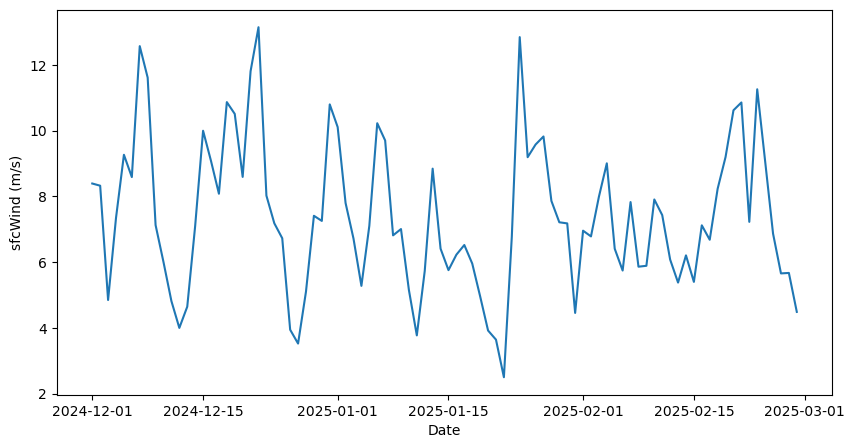

In [16]:
# plot the data
plt.figure(figsize=(10, 5))

plt.plot(
    new_sfcWind_df_subset["date"],
    new_sfcWind_df_subset["obs_mean"],
    label="sfcWind",
)

# Set the ylabel
plt.ylabel("sfcWind (m/s)")

# Set the xlabel
plt.xlabel("Date")

# print the min value
min_value = new_sfcWind_df_subset["obs_mean"].min()
print(f"Min value: {min_value}")

In [2]:
%%time

# Download two files to compare
april_hourly_file = "/gws/nopw/j04/canari/users/benhutch/ERA5/year_month/ERA5_EU_T_U10_V10_msl2025_01.nc"
may_hourly_file = "/gws/nopw/j04/canari/users/benhutch/ERA5/year_month/check_files/ERA5_EU_T_U10_V10_msl2025_01.nc"

# Set up the test file path to regrid to 
test_file_wind = "/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/s1961-r9i1p1f2/day/sfcWind/gn/files/d20200417/sfcWind_day_HadGEM3-GC31-MM_dcppA-hindcast_s1961-r9i1p1f2_gn_19720101-19720330.nc"

# Set up the grid box
wind_gridbox = {
    "lat1": 50,
    "lat2": 59.5,
    "lon1": -6,
    "lon2": 2
}


# Load in the cubes
april_cube_u10 = iris.load_cube(april_hourly_file, "u10")
april_cube_v10 = iris.load_cube(april_hourly_file, "v10")
may_cube_u10 = iris.load_cube(may_hourly_file, "u10")
may_cube_v10 = iris.load_cube(may_hourly_file, "v10")

# Load in the wind cube
wind_cube = iris.load_cube(test_file_wind, "sfcWind")

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/loading.py:582: IrisLoadWarning: Not all file objects were parsed correctly. See iris.loading.LOAD_PROBLEMS for details.
  warnings.warn(message, category=IrisLoadWarning)
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/fileformats/netcdf/loader.py:233: IrisLoadWarning: NetCDF variable `expver` is a variable length type of kind <class 'str'> thus the total data size cannot be known in advance. This may affect the lazy loading of the data.
  warnings.warn(msg, category=iris.warnings.IrisLoadWarning)


CPU times: user 291 ms, sys: 101 ms, total: 391 ms
Wall time: 837 ms


/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/fileformats/cf.py:880: IrisCfMissingVarWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'sfcWind'
  warnings.warn(


In [3]:
# First we calculate the hourly wind speeds from u and v components
# before averaging into daily means
windspeed_april_hourly = (april_cube_u10**2 + april_cube_v10.data**2) **0.5
windspeed_may_hourly = (may_cube_u10**2 + may_cube_v10**2) **0.5

In [5]:
# Rename the variables
windspeed_april_hourly.rename("si10")
windspeed_may_hourly.rename("si10")

In [6]:
# Select the first member from the wind cube
model_cube_first = wind_cube[0, :, :]

# ensure this is in -180 to 180
model_cube_first = model_cube_first.intersection(longitude=(-180, 180), latitude=(0, 90))

In [7]:
# Make sure all cubes are for the same european region
eu_grid = {
        "lon1": -40,  # degrees east
        "lon2": 30,
        "lat1": 30,  # degrees north
        "lat2": 80,
    }

# intersect the april cube
windspeed_april_hourly = windspeed_april_hourly.intersection(
    latitude=(eu_grid["lat1"], eu_grid["lat2"]),
    longitude=(eu_grid["lon1"], eu_grid["lon2"]),
)
# intersect the may cube
windspeed_may_hourly = windspeed_may_hourly.intersection(
    latitude=(eu_grid["lat1"], eu_grid["lat2"]),
    longitude=(eu_grid["lon1"], eu_grid["lon2"]),
)

# intersect the model cube
model_cube_first = model_cube_first.intersection(
    latitude=(eu_grid["lat1"], eu_grid["lat2"]),
    longitude=(eu_grid["lon1"], eu_grid["lon2"]),
)

In [8]:
# Sort the coords
model_cube_first.coord("latitude").units = windspeed_april_hourly[0].coord("latitude").units
model_cube_first.coord("longitude").units = windspeed_april_hourly[0].coord("longitude").units

# sort the attributes as well
model_cube_first.coord("latitude").attributes = windspeed_april_hourly[0].coord("latitude").attributes
model_cube_first.coord("longitude").attributes = windspeed_april_hourly[0].coord("longitude").attributes

In [9]:
# regrid the windspeed cubes to the model cube
april_wind_speed_regrid = windspeed_april_hourly.regrid(model_cube_first, iris.analysis.Linear())
may_wind_speed_regrid = windspeed_may_hourly.regrid(model_cube_first, iris.analysis.Linear())

In [10]:
# Subset both to the uk wind box
uk_wind_speed_april = april_wind_speed_regrid.intersection(
    latitude=(wind_gridbox["lat1"], wind_gridbox["lat2"]),
    longitude=(wind_gridbox["lon1"], wind_gridbox["lon2"]),
)
uk_wind_speed_may = may_wind_speed_regrid.intersection(
    latitude=(wind_gridbox["lat1"], wind_gridbox["lat2"]),
    longitude=(wind_gridbox["lon1"], wind_gridbox["lon2"]),
)

In [11]:
# Take the spatial means of this
uk_wind_speed_april_mean = uk_wind_speed_april.collapsed(["latitude", "longitude"], iris.analysis.MEAN)
uk_wind_speed_may_mean = uk_wind_speed_may.collapsed(["latitude", "longitude"], iris.analysis.MEAN)

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/cube.py:4341: IrisUserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/cube.py:4341: IrisUserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(


In [18]:
%%time

# extract the time coordinates
april_time = april_cube_u10.coord("time").points
may_time = may_cube_u10.coord("time").points

april_values = uk_wind_speed_april_mean.data
may_values = uk_wind_speed_may_mean.data

CPU times: user 4.2 s, sys: 1min 27s, total: 1min 31s
Wall time: 1min 1s


In [20]:
# Set up a dframe to hold the data
april_df = pd.DataFrame({
    "time": april_time,
    "windspeed": april_values,
})

may_df = pd.DataFrame({
    "time": may_time,
    "windspeed": may_values,
})

In [33]:
april_df

,time,windspeed,time_cf
time_dt,,,
2025-01-01 00:00:00,1735689600,11.730506,2025-01-01 00:00:00
2025-01-01 01:00:00,1735693200,11.756482,2025-01-01 01:00:00
2025-01-01 02:00:00,1735696800,11.671277,2025-01-01 02:00:00
2025-01-01 03:00:00,1735700400,11.590769,2025-01-01 03:00:00
2025-01-01 04:00:00,1735704000,11.564186,2025-01-01 04:00:00
...,...,...,...
2025-01-31 19:00:00,1738350000,3.145008,2025-01-31 19:00:00
2025-01-31 20:00:00,1738353600,3.257284,2025-01-31 20:00:00
2025-01-31 21:00:00,1738357200,3.483497,2025-01-31 21:00:00


In [23]:
times_cf_april = cftime.num2date(
    april_df["time"].values,
    uk_wind_speed_april_mean.coord("time").units.origin,
)

In [29]:
datetime_index_april = pd.to_datetime(april_df["time_cf"].astype(str))

In [30]:
datetime_index_april

0     2025-01-01 00:00:00
1     2025-01-01 01:00:00
2     2025-01-01 02:00:00
3     2025-01-01 03:00:00
4     2025-01-01 04:00:00
              ...        
739   2025-01-31 19:00:00
740   2025-01-31 20:00:00
741   2025-01-31 21:00:00
742   2025-01-31 22:00:00
743   2025-01-31 23:00:00
Name: time_cf, Length: 744, dtype: datetime64[ns]

In [31]:
# add the datetime index to the dataframe
april_df["time_dt"] = datetime_index_april

In [32]:
# set this as the index
april_df.set_index("time_dt", inplace=True)

In [34]:
# drop the time and time_cf columns
april_df.drop(columns=["time", "time_cf"], inplace=True)

In [35]:
april_df.head()

,windspeed
time_dt,
2025-01-01 00:00:00,11.730506
2025-01-01 01:00:00,11.756482
2025-01-01 02:00:00,11.671277
2025-01-01 03:00:00,11.590769
2025-01-01 04:00:00,11.564186


In [36]:
# calculate daily means
april_df_daily = april_df.resample("D").mean()

In [37]:
# find the minimum and maximum values
april_df_daily_min = april_df_daily.min()
april_df_daily_max = april_df_daily.max()

# print the results
print("April daily mean windspeed min: ", april_df_daily_min)
print("April daily mean windspeed max: ", april_df_daily_max)

April daily mean windspeed min:  windspeed    2.497001
dtype: float64
April daily mean windspeed max:  windspeed    12.841044
dtype: float64


In [25]:
# add this as a new column
april_df["time_cf"] = times_cf_april

In [27]:
# convert this to a datetime
april_df["time_dt"] = pd.to_datetime(april_df["time_cf"].values)

TypeError: <class 'cftime._cftime.DatetimeGregorian'> is not convertible to datetime, at position 0

In [22]:
may_df

,time,windspeed
0,1735689600,11.730506
1,1735693200,11.756481
2,1735696800,11.671277
3,1735700400,11.590769
4,1735704000,11.564186
...,...,...
739,1738350000,3.145008
740,1738353600,3.257284
741,1738357200,3.483497
742,1738360800,3.683989


In [17]:
april_values.shape

(744, 153, 301)

In [16]:
may_values

masked_array(
  data=[[[  4.4493256 ,   4.731552  ,   4.8604584 , ...,   4.0772552 ,
            4.240341  ,   4.3917084 ],
         [  3.1807709 ,   3.4669037 ,   3.754013  , ...,   4.6680756 ,
            4.821396  ,   4.974716  ],
         [  1.9024506 ,   2.1407318 ,   2.385849  , ...,   5.65831   ,
            5.691513  ,   5.7266693 ],
         ...,
         [ 14.281357  ,  13.879013  ,  13.3311615 , ...,  -0.93544006,
           -1.2928619 ,  -1.8661041 ],
         [ 15.816513  ,  15.668076  ,  15.329208  , ...,  -0.61317444,
           -0.8534088 ,  -1.4676666 ],
         [ 16.526474  ,  16.508896  ,  16.545029  , ...,  -0.5389557 ,
           -0.72743225,  -1.1756744 ]],

        [[  4.836151  ,   5.1115417 ,   5.21994   , ...,   3.724823  ,
            3.8507996 ,   3.9220886 ],
         [  3.6105652 ,   3.889862  ,   4.171112  , ...,   4.461151  ,
            4.5343933 ,   4.606659  ],
         [  2.3547058 ,   2.5959167 ,   2.8439636 , ...,   5.5763855 ,
            5.55978

In [2]:
# Set up the file
# Set up the path to the obs data
obs_wind_path = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_dfs/ERA5_sfcWind_UK_wind_box_1960-2025_daily_2025-04-24.csv"

# load the file
obs_wind_df = pd.read_csv(obs_wind_path)

obs_wind_df["time"] = pd.to_datetime(
        obs_wind_df["time"], origin="1952-01-01", unit="D"
    )

# make sure the time is in the right format
obs_wind_df["time"] = pd.to_datetime(obs_wind_df["time"])

# Subset to months 12, 1, 2
obs_wind_df = obs_wind_df[
    (obs_wind_df["time"].dt.month == 12)
    | (obs_wind_df["time"].dt.month == 1)
    | (obs_wind_df["time"].dt.month == 2)
]

In [3]:
# print the head of the dataframe
print(obs_wind_df.tail())

            time      data
22696 2025-02-24  8.906073
22697 2025-02-25  6.489247
22698 2025-02-26  4.319633
22699 2025-02-27  5.371262
22700 2025-02-28  4.016561


In [4]:
# limit time to between 2024-12-01 and 2025-03-01
obs_wind_df_subset = obs_wind_df[
    (obs_wind_df["time"] >= "2024-12-01")
    & (obs_wind_df["time"] <= "2025-03-01")
]

Mean wind speed is 6.760251048888889 m/s
Minimum wind speed occurs on 2025-01-22 00:00:00
Minimum wind speed is 1.7671347 m/s


Text(0.5, 1.0, 'ERA5 10m Wind Speed UK Box (Dec 2024 - Mar 2025)')

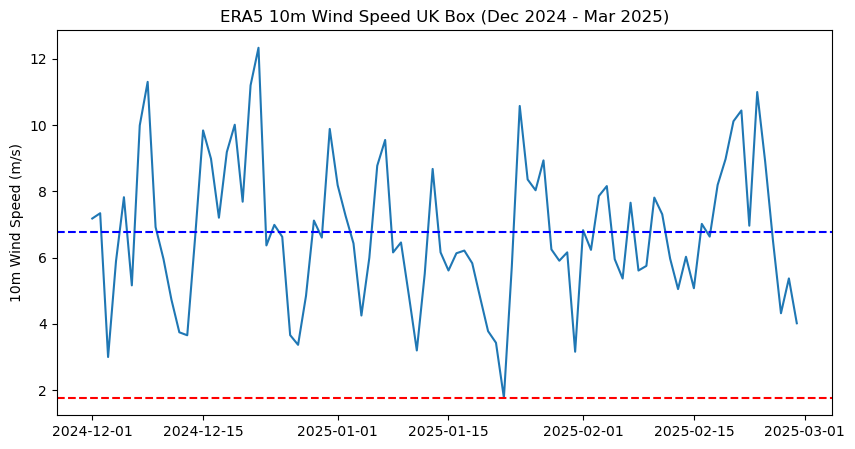

In [5]:
# Set up a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(
    obs_wind_df_subset["time"],
    obs_wind_df_subset["data"],
)

# |Set a horizontal line at the ,min
ax.axhline(
    y=obs_wind_df_subset["data"].min(),
    color="red",
    linestyle="--",
    label="Minimum Wind Speed",
)

# include a blue horizontal line for the mean
ax.axhline(
    y=obs_wind_df_subset["data"].mean(),
    color="blue",
    linestyle="--",
    label="Mean Wind Speed",
)

# print the mean wind speed
mean_wind = obs_wind_df_subset["data"].mean()

print(f"Mean wind speed is {mean_wind} m/s")

# print the date when the minimum wind speed occurs
min_date = obs_wind_df_subset.loc[
    obs_wind_df_subset["data"].idxmin(), "time"
]

print(f"Minimum wind speed occurs on {min_date}")
print(
    f"Minimum wind speed is {obs_wind_df_subset['data'].min()} m/s"
)

# set the ylabel
ax.set_ylabel("10m Wind Speed (m/s)")

# Set the title
ax.set_title("ERA5 10m Wind Speed UK Box (Dec 2024 - Mar 2025)")

Minimum wind speed occurs on 2006-02-02 00:00:00
Minimum wind speed is 2.343783 m/s
Mean wind speed is 6.950422091111111 m/s


Text(0.5, 1.0, 'ERA5 10m Wind Speed UK Box (Dec 2005 - Mar 2006)')

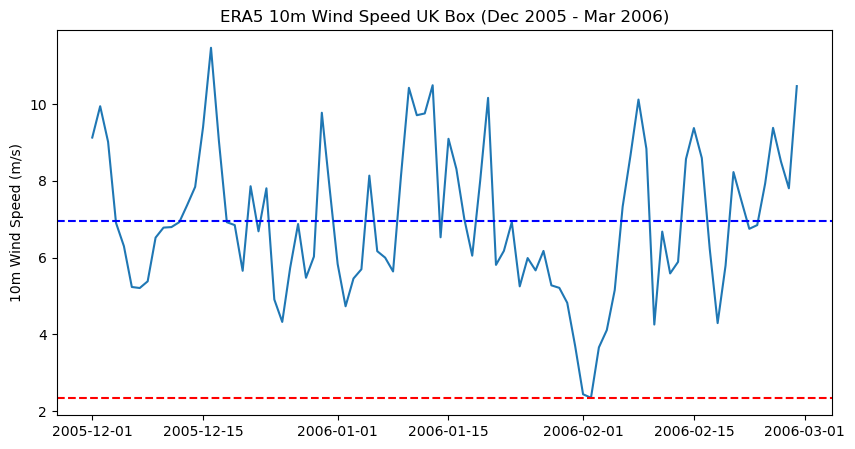

In [6]:
# subset the data to between 2005-12-01 and 2006-03-01
obs_wind_df_subset = obs_wind_df[
    (obs_wind_df["time"] >= "2005-12-01")
    & (obs_wind_df["time"] <= "2006-03-01")
]

# Set up a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(
    obs_wind_df_subset["time"],
    obs_wind_df_subset["data"],
)

# |Set a horizontal line at the ,min
ax.axhline(
    y=obs_wind_df_subset["data"].min(),
    color="red",
    linestyle="--",
    label="Minimum Wind Speed",
)
# print the date when the minimum wind speed occurs
min_date = obs_wind_df_subset.loc[
    obs_wind_df_subset["data"].idxmin(), "time"
]
print(f"Minimum wind speed occurs on {min_date}")
print(
    f"Minimum wind speed is {obs_wind_df_subset['data'].min()} m/s"
)

# include a blue horizontal line for the mean
ax.axhline(
    y=obs_wind_df_subset["data"].mean(),
    color="blue",
    linestyle="--",
    label="Mean Wind Speed",
)

# print the mean wind speed
mean_wind = obs_wind_df_subset["data"].mean()

# print the mean wind speed
print(f"Mean wind speed is {mean_wind} m/s")

# set the ylabel
ax.set_ylabel("10m Wind Speed (m/s)")
# Set the title
ax.set_title("ERA5 10m Wind Speed UK Box (Dec 2005 - Mar 2006)")

In [2]:
# %%time

# # Load in the ERA5 data
# era5_wind_fpath = "/gws/nopw/j04/canari/users/benhutch/ERA5/ERA5_wind_daily_1952_2020.nc"

# # load this in with iris
# wind_cube = iris.load_cube(era5_wind_fpath, 'si10')

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


CPU times: user 209 ms, sys: 58.7 ms, total: 268 ms
Wall time: 1.1 s


In [3]:
# # Extract the lats and lons
# lats = wind_cube.coord('latitude').points
# lons = wind_cube.coord('longitude').points

# # print the min and max lat an dlon
# print(f"Latitude: {lats.min()} to {lats.max()}")
# print(f"Longitude: {lons.min()} to {lons.max()}")

Latitude: 29.929733276367188 to 89.78487396240234
Longitude: -45.0 to 40.21900177001953


In [23]:
# # Set up our constraints
# start_date = cftime.datetime(2000, 11, 1, 0, 0, 0)
# end_date = cftime.datetime(2001, 2, 28, 23, 59, 59)

# # create datetimes between 2000-11-01 and 2001-02-28
# dates = pd.date_range("2000-11-01", "2001-02-28", freq="D")

# # Set up the lat point
# lat = 51.5
# lon = 0.0

# # Set up the constraint on time
# time_constraint = iris.Constraint(time=lambda cell: start_date <= cell <= end_date)

# # Find the nearest lat and lon points to the lat and lon we want
# closest_lat_idx = np.abs(lats - lat).argmin()
# closest_lon_idx = np.abs(lons - lon).argmin()

# # Set up the constraint on lat and lon
# lat_constraint = iris.Constraint(latitude=lats[closest_lat_idx])
# lon_constraint = iris.Constraint(longitude=lons[closest_lon_idx])

In [5]:
# # apply the time constrain
# wind_cube = wind_cube.extract(time_constraint)

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/common/mixin.py:203: FutureWarning: You are using legacy date precision for Iris units - max precision is seconds. In future, Iris will use microsecond precision - available since cf-units version 3.3 - which may affect core behaviour. To opt-in to the new behaviour, set `iris.FUTURE.date_microseconds = True`.
  warnings.warn(message, category=FutureWarning)


In [10]:
# # apply the lat and lon constrain
# wind_cube_ts = wind_cube.extract(lat_constraint & lon_constraint)

In [11]:
# wind_cube_ts

Si10 (unknown),time
Shape,120
Dimension coordinates,
time,x
Scalar coordinates,
latitude,51.569065 degrees
longitude,0.0001320132 degrees
Attributes,
Conventions,'CF-1.6'
history,'2021-02-05 15:08:48 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf ...'


[cftime.DatetimeProlepticGregorian(2000, 11, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 2, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 3, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 4, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 5, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 6, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 7, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 8, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 9, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 10, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 11, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2000, 11, 12, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(20

(array([11262., 11276., 11292., 11306., 11323., 11337., 11354., 11368.,
        11382.]),
 [Text(11262.0, 0, '2000-11-01'),
  Text(11276.0, 0, '2000-11-15'),
  Text(11292.0, 0, '2000-12-01'),
  Text(11306.0, 0, '2000-12-15'),
  Text(11323.0, 0, '2001-01-01'),
  Text(11337.0, 0, '2001-01-15'),
  Text(11354.0, 0, '2001-02-01'),
  Text(11368.0, 0, '2001-02-15'),
  Text(11382.0, 0, '2001-03-01')])

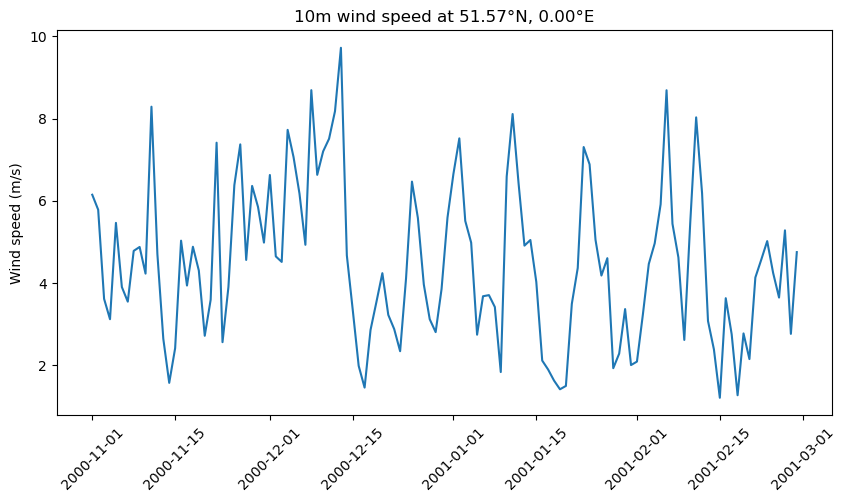

In [27]:
# # Plot the time series of this
# fig, ax = plt.subplots(figsize=(10, 5))

# # Include the lat and lon to 2dp in the title
# ax.set_title(f"10m wind speed at {lats[closest_lat_idx]:.2f}°N, {lons[closest_lon_idx]:.2f}°E")

# # time:long_name = "time" ;
# # time:units = "days since 1952-01-01 00:00:00" ;
# # time:calendar = "proleptic_gregorian" ;
# times_dt = cftime.num2date(
#         wind_cube_ts.coord('time').points,
#         units="days since 1952-01-01 00:00:00",
#         calendar="proleptic_gregorian"  # Adjust the calendar if needed
#     )

# # # convert to pandas datetime
# # times_dt = pd.to_datetime(times_dt)

# # print the times
# print(times_dt)

# # Plot the time series
# ax.plot(dates, wind_cube_ts.data, label='Wind speed')
# # ax.set_xlabel('Time')
# ax.set_ylabel('Wind speed (m/s)')

# # pivot the xlables 45 degrees
# plt.xticks(rotation=45)